In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime=pd.read_csv('Crime_Data_2010_2017.csv')

In [3]:
crime.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [4]:
new_col=['DR_Number', 'Date_Reported', 'Date_Occurred', 'Time_Occurred',
       'Area_ID', 'Area_Name', 'Reporting_District', 'Crime_Code',
       'Crime_Code_Description', 'MO Codes', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise Code', 'Premise Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status_Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ']
crime.columns=new_col

In [5]:
#crime.Crime_Code.value_counts()
#top5=[624,510,330,310,440]

In [6]:
crime2=crime[['Area_ID','Crime_Code','Victim_Age', 'Victim_Sex','Victim_Descent']].dropna()
crime2=crime2.loc[crime2.Crime_Code==210]
sex=['M','F']
crime2=crime2.loc[crime2.Victim_Sex.isin(sex)] #robbery

In [8]:
crime22=crime[['Area_ID','Crime_Code','Victim_Age', 'Victim_Sex','Victim_Descent']].dropna()
crime22=crime22.loc[crime22.Crime_Code==625]
sex=['M','F']
crime22=crime22.loc[crime22.Victim_Sex.isin(sex)] #battery

In [9]:
crime2.groupby(['Area_ID','Victim_Sex']).Victim_Age.median().unstack() #median age for M and F in each area

Victim_Sex,F,M
Area_ID,,
1,40.0,41.0
2,31.0,31.0
3,30.0,28.0
4,34.0,26.0
5,33.0,27.0
6,28.0,29.0
7,30.0,30.0
8,34.0,29.0
9,33.0,29.0


Text(0.5, 1.0, 'Amount of Robbery reported in each Area')

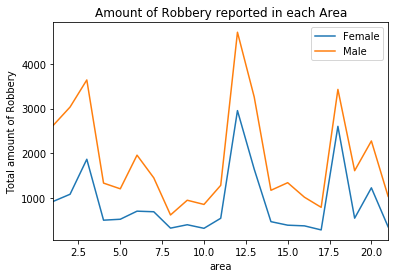

In [10]:
crime3=crime2.groupby(['Area_ID','Victim_Sex']).agg({'Victim_Sex':'count'}).unstack()
crime3.plot()
plt.legend(labels=['Female','Male'])
plt.xlabel('area')
plt.ylabel('Total amount of Robbery')
plt.title('Amount of Robbery reported in each Area')

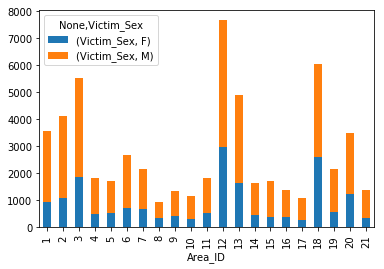

In [11]:
crime3=crime2.groupby(['Area_ID','Victim_Sex']).agg({'Victim_Sex':'count'}).unstack()
crime3.plot.bar(stacked=True)

In [12]:
crime22.groupby(['Area_ID','Victim_Sex']).Victim_Age.median().unstack() #median age for M and F in each area

Victim_Sex,F,M
Area_ID,,
1,39.5,34.0
2,32.0,40.0
3,30.0,50.0
4,39.0,40.0
5,37.5,34.0
6,33.0,39.5
7,37.0,37.0
8,38.5,43.0
9,34.0,41.5


Text(0.5, 1.0, 'Amount of Battery reported in each Area')

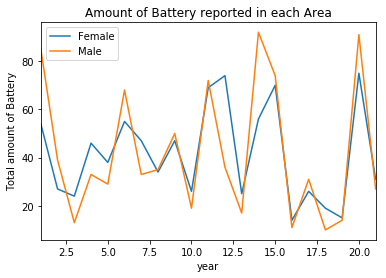

In [13]:
crime33=crime22.groupby(['Area_ID','Victim_Sex']).agg({'Victim_Sex':'count'}).unstack()
crime33.plot()
plt.legend(labels=['Female','Male'])
plt.xlabel('year')
plt.ylabel('Total amount of Battery')
plt.title('Amount of Battery reported in each Area')

In [14]:
crime4_m=crime2.loc[crime2.Victim_Sex=='M'][['Area_ID','Victim_Descent']].groupby('Area_ID').Victim_Descent.value_counts()

In [16]:
b=pd.DataFrame({crime4_m.unstack().index[i].astype(str):crime4_m[i+1].head(4)  for i in range(21)})

Text(0.5, 1.0, 'Top 5 racial group of Male Victim in each Area ')

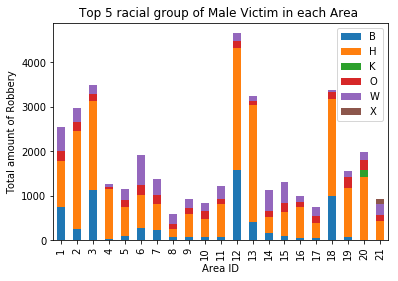

In [17]:
d=b.T.fillna(0)
d.plot.bar(stacked=True)
plt.xlabel('Area ID')
plt.ylabel('Total amount of Robbery')
plt.title('Top 5 racial group of Male Victim in each Area ')

Text(0.5, 1.0, 'Top 5 racial group of Female Victim in each Area ')

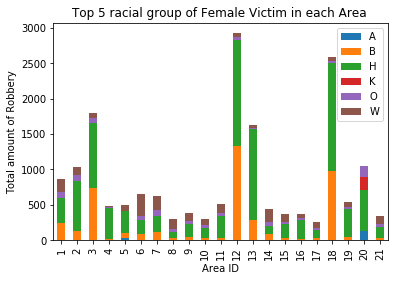

In [18]:
crime4_f=crime2.loc[crime2.Victim_Sex=='F'][['Area_ID','Victim_Descent']].groupby('Area_ID').Victim_Descent.value_counts()
b=pd.DataFrame({crime4_f.unstack().index[i].astype(str):crime4_f[i+1].head(4)  for i in range(21)})
d=b.T.fillna(0)
d.plot.bar(stacked=True)
plt.xlabel('Area ID')
plt.ylabel('Total amount of Robbery')
plt.title('Top 5 racial group of Female Victim in each Area ')